<a href="https://colab.research.google.com/github/chelaam/Projects/blob/main/House_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import preprocessing

## Preparing the data

In [181]:
df = pd.read_csv('/content/house_price_regression_dataset.csv')
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [183]:
df.isna().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


array([[<Axes: title={'center': 'Square_Footage'}>,
        <Axes: title={'center': 'Num_Bedrooms'}>,
        <Axes: title={'center': 'Num_Bathrooms'}>],
       [<Axes: title={'center': 'Year_Built'}>,
        <Axes: title={'center': 'Lot_Size'}>,
        <Axes: title={'center': 'Garage_Size'}>],
       [<Axes: title={'center': 'Neighborhood_Quality'}>,
        <Axes: title={'center': 'House_Price'}>, <Axes: >]], dtype=object)

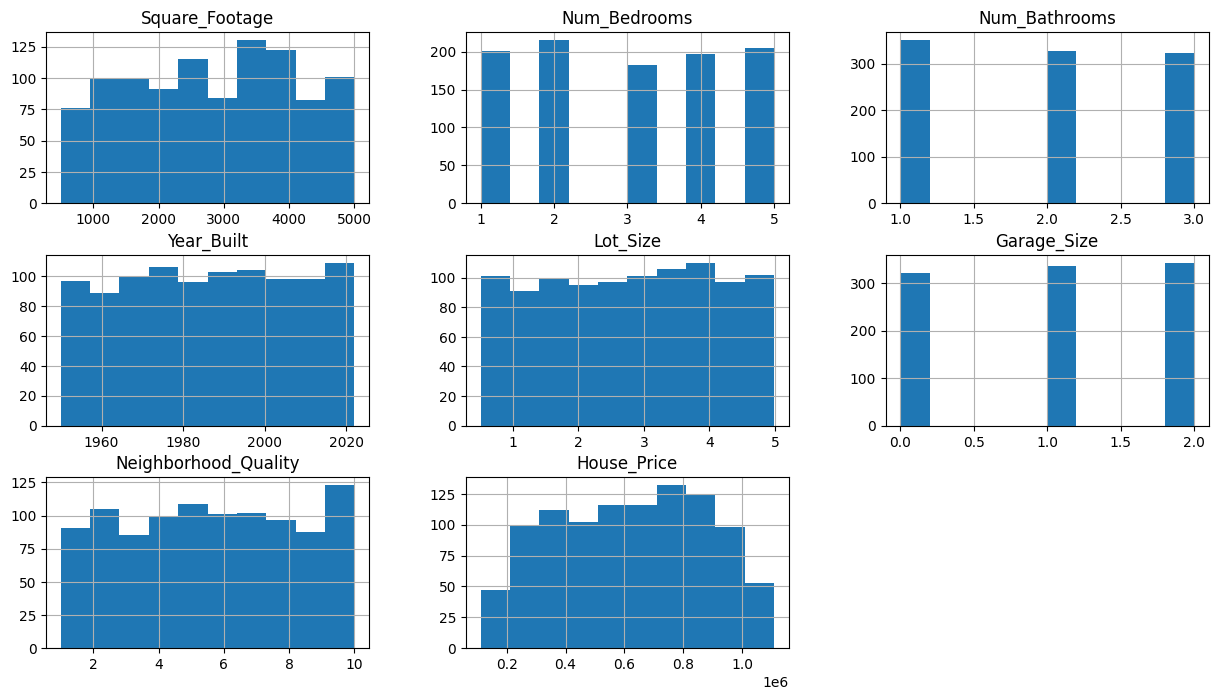

In [184]:
df.hist(figsize=(15,8))

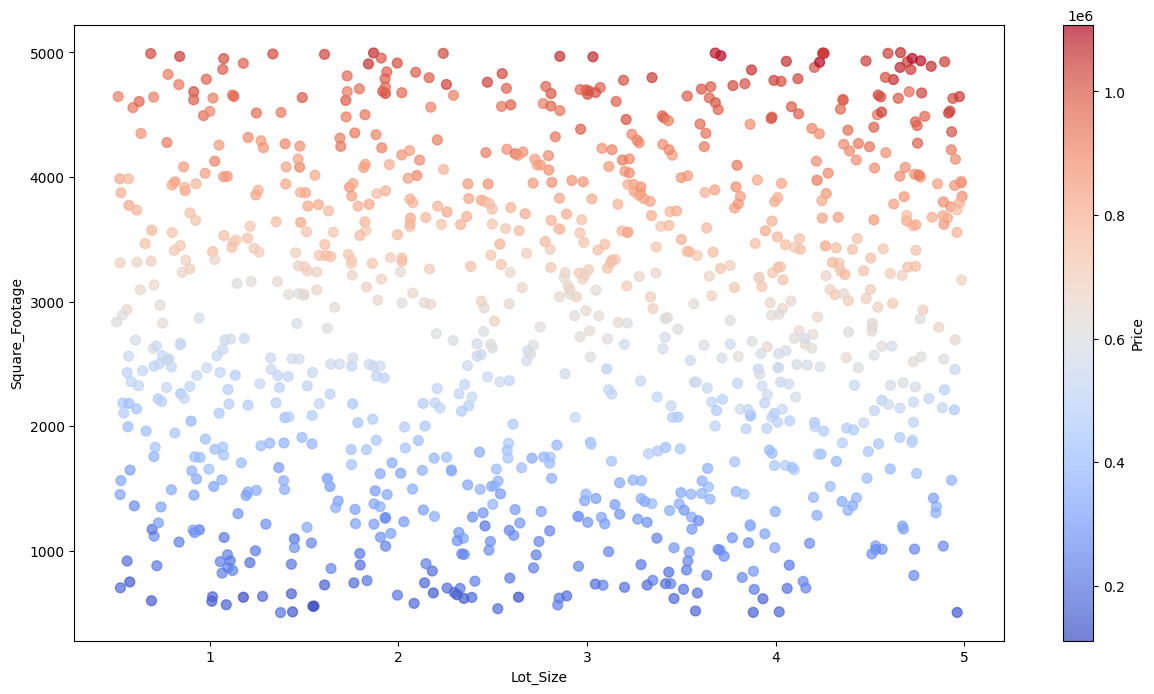

In [185]:
plt.figure(figsize=(15,8))
# plt.scatter(df['House_Price'],df['Square_Footage'],color='r')
# plt.scatter(df['House_Price'],df['Lot_Size'],color='b')
# plt.xlabel('House_Price')
# plt.ylabel('Square_Footage')
# plt.show()

scatter = plt.scatter(df['Lot_Size'],df['Square_Footage'],c=df['House_Price'], cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar(scatter,label = "Price")
plt.xlabel('Lot_Size')
plt.ylabel('Square_Footage')
plt.show()




In [186]:
X = np.array(df.drop('House_Price',axis=1))
y = np.array(df['House_Price'])

In [187]:
y

array([ 262382.85227406,  985260.85449016,  777977.39011858,
        229698.91866361, 1041740.8589249 ,  879796.98352238,
        814427.86140899,  703413.11094468,  173875.03721558,
        504176.50605937,  335332.59275294,  635097.3959198 ,
        701133.80414712,  440726.28481629,  838719.4305035 ,
       1019192.6613592 ,  735850.81234216,  234261.64997474,
        396246.35888875,  672852.051981  ,  586086.56853891,
        740174.01465508,  370167.09090272,  530824.19677521,
        227515.30028798,  652166.14236589,  745670.63714772,
        513161.95119306,  432357.90610274,  434165.89663405,
        809686.20114353,  883819.09112186,  912468.04790467,
        281313.06144485,  705923.31489162,  656980.46042822,
        318266.27713209,  582468.79773652,  541967.63355925,
        188531.42345711,  565562.75043214,  697574.55566703,
        666733.47346169,  376388.02162864,  485380.95019563,
        735678.46220173,  296291.00100751, 1046315.89601366,
        187508.58531168,

In [188]:
X.shape

(1000, 7)

In [189]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [190]:
y_train

array([ 366271.84555605,  666733.47346169,  863034.67574983,
        619360.96936784,  362719.62685852,  918893.74392356,
        269665.8613984 ,  828512.10195891,  234261.64997474,
        402213.42189319,  572608.43139653, 1027285.77032858,
        740330.46720387,  304653.63604893,  875163.04606923,
        993273.07966063,  483905.99838996,  252963.35620761,
        638284.47895536,  867445.41846209,  645375.2217757 ,
        296184.19659572,  806645.0448681 ,  910000.38595709,
        736289.12455508, 1075814.43188084,  858011.51354295,
        822030.76671267,  146406.89625235, 1017583.427361  ,
        596659.36854928,  624411.60246829,  396681.28609618,
        660979.04748869,  140538.08318538,  261227.31872034,
        949404.20066573,  354744.63059531,  818613.71080341,
        738935.81944604,  897666.0008463 ,  914555.74500336,
        194628.72736204,  327253.45798299,  606157.49727133,
        364834.6821528 ,  796470.1732393 ,  804450.09900713,
        762080.82354712,

<Axes: xlabel='Square_Footage', ylabel='Year_Built'>

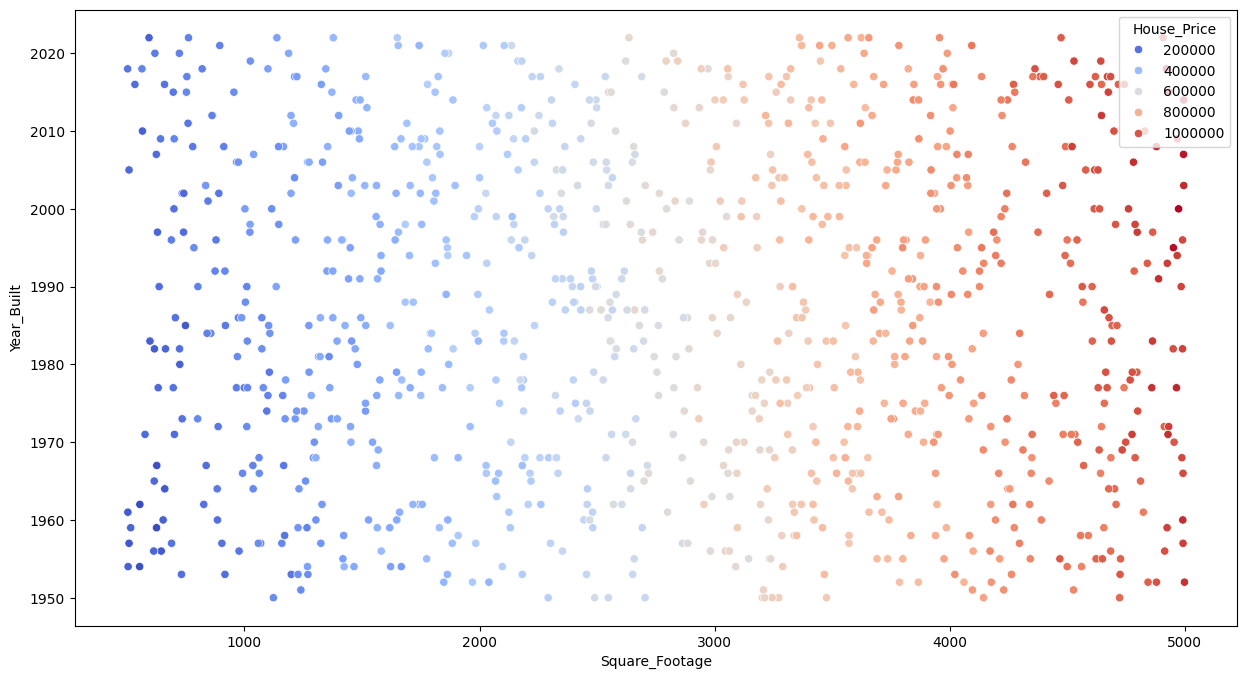

In [191]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Square_Footage',y='Year_Built',data=df,hue="House_Price",palette='coolwarm')

### Stadardising the dataset

In [192]:
y_train

array([ 366271.84555605,  666733.47346169,  863034.67574983,
        619360.96936784,  362719.62685852,  918893.74392356,
        269665.8613984 ,  828512.10195891,  234261.64997474,
        402213.42189319,  572608.43139653, 1027285.77032858,
        740330.46720387,  304653.63604893,  875163.04606923,
        993273.07966063,  483905.99838996,  252963.35620761,
        638284.47895536,  867445.41846209,  645375.2217757 ,
        296184.19659572,  806645.0448681 ,  910000.38595709,
        736289.12455508, 1075814.43188084,  858011.51354295,
        822030.76671267,  146406.89625235, 1017583.427361  ,
        596659.36854928,  624411.60246829,  396681.28609618,
        660979.04748869,  140538.08318538,  261227.31872034,
        949404.20066573,  354744.63059531,  818613.71080341,
        738935.81944604,  897666.0008463 ,  914555.74500336,
        194628.72736204,  327253.45798299,  606157.49727133,
        364834.6821528 ,  796470.1732393 ,  804450.09900713,
        762080.82354712,

In [193]:
pd.DataFrame(x_train).iloc[:,0:10]

,0,1,2,3,4,5,6
0,1492.0,4.0,1.0,2014.0,2.433303,1.0,2.0
1,3112.0,2.0,3.0,1980.0,2.656670,0.0,9.0
2,4046.0,1.0,3.0,1978.0,3.201267,1.0,7.0
3,2886.0,5.0,1.0,1957.0,2.934513,2.0,5.0
4,1323.0,4.0,1.0,1986.0,4.384110,1.0,6.0
...,...,...,...,...,...,...,...
795,3951.0,4.0,2.0,1971.0,2.714245,2.0,4.0
796,2173.0,5.0,3.0,1978.0,4.598612,2.0,1.0
797,4219.0,1.0,2.0,1993.0,4.931806,1.0,8.0
798,2193.0,5.0,1.0,1968.0,3.661881,0.0,10.0


In [194]:
x_train =preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)
y_train = preprocessing.scale(y_train)
y_test = preprocessing.scale(y_test)
pd.DataFrame(x_train).iloc[:,0:10]

,0,1,2,3,4,5,6
0,-1.037191,0.704108,-1.178169,1.322812,-0.274258,-0.007701,-1.234821
1,0.254823,-0.693625,1.260473,-0.322763,-0.099868,-1.239819,1.169559
2,0.999724,-1.392491,1.260473,-0.419561,0.325315,-0.007701,0.482594
3,0.074579,1.402974,-1.178169,-1.435945,0.117052,1.224418,-0.204372
4,-1.171975,0.704108,-1.178169,-0.032367,1.248797,-0.007701,0.139111
...,...,...,...,...,...,...,...
795,0.923958,0.704108,0.041152,-0.758356,-0.054918,1.224418,-0.547855
796,-0.494067,1.402974,1.260473,-0.419561,1.416265,1.224418,-1.578304
797,1.137699,-1.392491,0.041152,0.306428,1.676400,-0.007701,0.826076
798,-0.478116,1.402974,-1.178169,-0.903554,0.684930,-1.239819,1.513042


In [197]:
pd.DataFrame(y_train).iloc[:10]

,0
0,-0.981181
1,0.207029
2,0.983324
3,0.019689
4,-0.995228
5,1.204225
6,-1.363220
7,0.846801
8,-1.503230
9,-0.839046


### Convert the arrays to tnesor in the correct format

In [198]:
x_train = torch.tensor(x_train).float()
x_test = torch.tensor(x_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()

In [199]:
x_train


tensor([[-1.0372,  0.7041, -1.1782,  ..., -0.2743, -0.0077, -1.2348],
        [ 0.2548, -0.6936,  1.2605,  ..., -0.0999, -1.2398,  1.1696],
        [ 0.9997, -1.3925,  1.2605,  ...,  0.3253, -0.0077,  0.4826],
        ...,
        [ 1.1377, -1.3925,  0.0412,  ...,  1.6764, -0.0077,  0.8261],
        [-0.4781,  1.4030, -1.1782,  ...,  0.6849, -1.2398,  1.5130],
        [-0.5323, -0.6936, -1.1782,  ...,  1.3582, -0.0077, -1.2348]])

In [200]:

x_train.shape,y_train.shape,x_test.shape,y_test.shape

(torch.Size([800, 7]),
 torch.Size([800]),
 torch.Size([200, 7]),
 torch.Size([200]))

In [201]:
from torch import nn

class Model0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Sequential(
        nn.Linear(in_features = 7, out_features = 800),
        nn.ReLU(),
        nn.Linear(in_features = 800, out_features = 1
    )
    )


  def forward(self,x):
    return self.layer1(x)

In [202]:
model = Model0()

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)






In [203]:
next(model.parameters()).device

device(type='cpu')

In [204]:
model.state_dict()

OrderedDict([('layer1.0.weight',
              tensor([[ 0.2890,  0.3137, -0.0885,  ..., -0.0828,  0.0763, -0.1840],
                      [ 0.2220,  0.3332, -0.2773,  ...,  0.0707,  0.2792,  0.0512],
                      [ 0.1822, -0.0534,  0.2914,  ..., -0.1764,  0.0963, -0.1741],
                      ...,
                      [-0.2959, -0.2260,  0.3576,  ...,  0.2042,  0.2284, -0.3069],
                      [-0.0433, -0.0040,  0.2804,  ...,  0.3414, -0.3172,  0.1579],
                      [ 0.2064, -0.1362, -0.1243,  ...,  0.1003,  0.1267, -0.1329]])),
             ('layer1.0.bias',
              tensor([ 0.3057, -0.0579, -0.0589,  0.2952,  0.0662,  0.2023,  0.2228, -0.2474,
                      -0.0048,  0.3338, -0.2337,  0.0495,  0.2808,  0.0417, -0.0847,  0.1367,
                      -0.3126,  0.3105,  0.2969, -0.1058, -0.1367, -0.0739,  0.3761, -0.1451,
                       0.1132, -0.3588,  0.1142,  0.2290,  0.1223, -0.0180,  0.0276,  0.3273,
                       0.1

In [205]:
next(model.parameters())


Parameter containing:
tensor([[ 0.2890,  0.3137, -0.0885,  ..., -0.0828,  0.0763, -0.1840],
        [ 0.2220,  0.3332, -0.2773,  ...,  0.0707,  0.2792,  0.0512],
        [ 0.1822, -0.0534,  0.2914,  ..., -0.1764,  0.0963, -0.1741],
        ...,
        [-0.2959, -0.2260,  0.3576,  ...,  0.2042,  0.2284, -0.3069],
        [-0.0433, -0.0040,  0.2804,  ...,  0.3414, -0.3172,  0.1579],
        [ 0.2064, -0.1362, -0.1243,  ...,  0.1003,  0.1267, -0.1329]],
       requires_grad=True)

In [208]:
model(x_train)

tensor([[ 8.3923e-02],
        [ 4.5633e-01],
        [ 2.5787e-01],
        [ 6.6691e-02],
        [ 1.2863e-01],
        [ 5.3457e-01],
        [-1.7460e-01],
        [ 7.1477e-02],
        [-1.0405e-01],
        [ 2.5331e-01],
        [ 3.5332e-01],
        [-2.6186e-02],
        [ 1.2138e-01],
        [ 1.9408e-01],
        [ 1.9766e-01],
        [ 1.3070e-01],
        [ 2.0926e-01],
        [ 2.3431e-02],
        [ 8.4944e-02],
        [ 3.5661e-01],
        [ 3.0356e-01],
        [ 2.2751e-01],
        [ 8.3402e-03],
        [ 1.0198e-01],
        [ 2.5546e-01],
        [ 1.8321e-01],
        [ 2.6920e-01],
        [ 1.3375e-01],
        [ 4.3990e-03],
        [ 6.8891e-02],
        [ 7.9908e-02],
        [ 1.6897e-01],
        [ 4.7126e-02],
        [ 5.4610e-02],
        [ 3.6054e-01],
        [ 2.3386e-01],
        [ 3.6072e-01],
        [ 4.1112e-02],
        [-1.2717e-02],
        [ 2.3771e-01],
        [ 1.6730e-01],
        [ 4.2537e-01],
        [ 1.8953e-01],
        [-4

In [209]:

def accuaracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  accuaracy = correct/ len(y_pred) * 100
  return accuaracy

## Training the model

In [212]:
torch.manual_seed(42)

epochs = 5000

for epoch in range(epochs):
  model.train()

  y_pred = model(x_train)
  loss = loss_fn(y_pred,y_train)
  accuracy = accuaracy_fn(y_train,y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_pred = model(x_test)
    test_loss = loss_fn(test_pred,y_test)
    test_accuracy = accuaracy_fn(y_test,test_pred)

    if epoch % 10 == 0:
      # print(f"Test: {test_pred}    Pred:   {y_pred}" )
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {accuracy:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_accuracy:.2f}%")





Epoch: 0 | Loss: 1.00002 | Acc: 0.00% | Test Loss: 1.00011 | Test Acc: 0.00%
Epoch: 10 | Loss: 1.00002 | Acc: 0.00% | Test Loss: 1.00011 | Test Acc: 0.00%
Epoch: 20 | Loss: 1.00002 | Acc: 0.00% | Test Loss: 1.00010 | Test Acc: 0.00%
Epoch: 30 | Loss: 1.00001 | Acc: 0.00% | Test Loss: 1.00010 | Test Acc: 0.00%
Epoch: 40 | Loss: 1.00001 | Acc: 0.00% | Test Loss: 1.00010 | Test Acc: 0.00%
Epoch: 50 | Loss: 1.00001 | Acc: 0.00% | Test Loss: 1.00010 | Test Acc: 0.00%
Epoch: 60 | Loss: 1.00001 | Acc: 0.00% | Test Loss: 1.00010 | Test Acc: 0.00%
Epoch: 70 | Loss: 1.00001 | Acc: 0.00% | Test Loss: 1.00010 | Test Acc: 0.00%
Epoch: 80 | Loss: 1.00001 | Acc: 0.00% | Test Loss: 1.00010 | Test Acc: 0.00%
Epoch: 90 | Loss: 1.00001 | Acc: 0.00% | Test Loss: 1.00010 | Test Acc: 0.00%
Epoch: 100 | Loss: 1.00001 | Acc: 0.00% | Test Loss: 1.00010 | Test Acc: 0.00%
Epoch: 110 | Loss: 1.00001 | Acc: 0.00% | Test Loss: 1.00010 | Test Acc: 0.00%
Epoch: 120 | Loss: 1.00001 | Acc: 0.00% | Test Loss: 1.00010 | 